# Home Work - 3: Machine Learning COMS4721
### - Vinayak Bakshi, vb2424

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# import libraries
import math 
import numpy as np
import numpy.linalg as nplg
import matplotlib.pyplot as plt
import pandas as pd
# from scipy.interpolate import Rbf
%matplotlib inline



In [23]:
#Import Data as Numpy Matrices

X_train = np.genfromtxt ('./gaussian_process/X_train.csv', delimiter=",")
Y_train = np.genfromtxt ('./gaussian_process/y_train.csv',delimiter=",")
X_test = np.genfromtxt ('./gaussian_process/X_test.csv', delimiter=",")
Y_test = np.genfromtxt ('./gaussian_process/y_test.csv',delimiter=",")

In [37]:
from sklearn import linear_model
import math 
import numpy as np
import numpy.linalg as nplg
import matplotlib.pyplot as plt
import pandas as pd

lm = linear_model.LinearRegression()
lm.fit(X_train,Y_train)
lm.coef_

array([-0.45626139,  0.7301673 , -0.28461867, -5.58558944,  0.28957774,
        2.78139798,  0.        ])

In [41]:
bias=np.array(lm.intercept_)
final=np.append(bias,lm.coef_)
final

array([ 0.01015709, -0.45626139,  0.7301673 , -0.28461867, -5.58558944,
        0.28957774,  2.78139798,  0.        ])

In [4]:
# Define Kernel functions

def Kernel_Vector(X,x,b):
    x_mat=np.transpose(np.outer(x,np.ones(len(X))))
    norm_vec=np.square(nplg.norm(X-x_mat,2,1))
    return np.exp(-(1.0/b)*norm_vec)

def Kernel_Matrix(X,b):
    K=[]
    for i in xrange(len(X)):
        K_temp=Kernel_Vector(X,X[i],b)
        K.append(K_temp)
    return np.matrix(K) 

In [36]:
X_train[:,1:2]

array([[-0.36707 ],
       [ 0.3592  ],
       [-0.99778 ],
       [-0.69198 ],
       [-0.92133 ],
       [-0.92133 ],
       [-0.51997 ],
       [-0.77799 ],
       [ 0.0534  ],
       [ 1.4964  ],
       [-0.83533 ],
       [ 1.0568  ],
       [-0.98823 ],
       [ 0.3592  ],
       [ 0.29231 ],
       [ 0.53121 ],
       [-0.93089 ],
       [ 1.4964  ],
       [-0.85444 ],
       [-0.57731 ],
       [-0.99778 ],
       [-0.41485 ],
       [ 1.9646  ],
       [-0.99778 ],
       [-0.76843 ],
       [ 0.29231 ],
       [-0.72065 ],
       [-0.69198 ],
       [ 0.53121 ],
       [-0.70154 ],
       [ 1.0281  ],
       [-0.20462 ],
       [ 0.53121 ],
       [ 2.2418  ],
       [-0.92133 ],
       [-0.41485 ],
       [ 1.181   ],
       [-0.41485 ],
       [-0.56775 ],
       [ 1.9646  ],
       [ 0.53121 ],
       [-0.92133 ],
       [-0.93089 ],
       [-0.83533 ],
       [-0.7111  ],
       [ 1.181   ],
       [-0.46264 ],
       [ 1.5824  ],
       [-0.93089 ],
       [-0.82577 ],


In [5]:
# Implementation of Gaussian Process

sigma2=np.linspace(0.1,1,10)
b_space=np.linspace(5,15,6)
RMSE=[]
RMSE_table=np.zeros((len(sigma2),len(b_space)))

for sig in xrange(len(sigma2)):
    for b in xrange(len(b_space)):
        Y_pred=[]
        for i in xrange(len(X_test)):
            Kv=Kernel_Vector(X_train,X_test[i],b_space[b])
            mean=np.asscalar((Kv.dot(nplg.inv(Kernel_Matrix(X_train,b_space[b]) + ((sigma2[sig]))*np.identity(len(X_train))))).dot(Y_train))
            Y_pred.append(mean)
        RMSE.append(np.sqrt((1.0/len(Y_test))*sum(np.square(np.array(Y_pred)-Y_test))))
        RMSE_table[sig][b]= np.sqrt((1.0/len(Y_test))*sum(np.square(np.array(Y_pred)-Y_test)))
        

## 1 (b): RMSE Table

In [6]:
df=pd.DataFrame(RMSE_table)
df.columns=[m+str(n) for m,n in zip(['b = ']*len(b_space),b_space)]
df.index = [m+str(n) for m,n in zip(['$\sigma^2$ = ']*len(sigma2),sigma2)]
df
# plt.scatter(range(60),RMSE)

,b = 5.0,b = 7.0,b = 9.0,b = 11.0,b = 13.0,b = 15.0
$\sigma^2$ = 0.1,1.966276,1.920163,1.897649,1.890507,1.895849,1.909603
$\sigma^2$ = 0.2,1.933135,1.904877,1.902519,1.914981,1.935586,1.959549
$\sigma^2$ = 0.3,1.923420,1.908080,1.917648,1.938849,1.964597,1.990804
$\sigma^2$ = 0.4,1.922198,1.915902,1.932514,1.957936,1.985502,2.011915
$\sigma^2$ = 0.5,1.924769,1.924804,1.945699,1.973216,2.001314,2.027370
$\sigma^2$ = 0.6,1.929213,1.933701,1.957235,1.985764,2.013878,2.039465
$\sigma^2$ = 0.7,1.934634,1.942254,1.967403,1.996375,2.024310,2.049463
$\sigma^2$ = 0.8,1.940583,1.950380,1.976492,2.005603,2.033307,2.058105
$\sigma^2$ = 0.9,1.946820,1.958093,1.984741,2.013835,2.041317,2.065845
$\sigma^2$ = 1.0,1.953213,1.965438,1.992341,2.021345,2.048642,2.072976


## 1 (c): Best RMSE value = 1.8905, for b=11, sigma = 0.1

Compared to the first homework where we use ridge regression, we obtain a minimum RMSE of **2.192** for hyper-parameter =21 and polynomial of degree 2. By using Gaussian process we obtain a minimum RMSE of **1.8905**. Therefore this approach is better in terms of accuracy.

**Drawback:** We do not obtain feature weights as output from the Gaussian process implementation. Hence we do not know the importance of features in the prediction of output since they are being mapped to a higher dimensional space.

## 1 (d):  Gaussian Process for 4th dimension

In [7]:
X_train_4th_dim = np.hstack((np.ones((X_train.shape[0],1)),np.transpose(np.matrix(X_train[:,3]))))

Y_pred=[]
b=5
sig2=2

for i in xrange(len(X_train_4th_dim)):
    Kv=Kernel_Vector(X_train_4th_dim,X_train_4th_dim[i],b)
    mean=np.asscalar((Kv.dot(nplg.inv(Kernel_Matrix(X_train_4th_dim,b) + ((sig2))*np.identity(len(X_train_4th_dim))))).dot(Y_train))
    Y_pred.append(mean)
    

In [8]:
X_train_4th = np.array(X_train_4th_dim[:,1].flatten().tolist()[0])

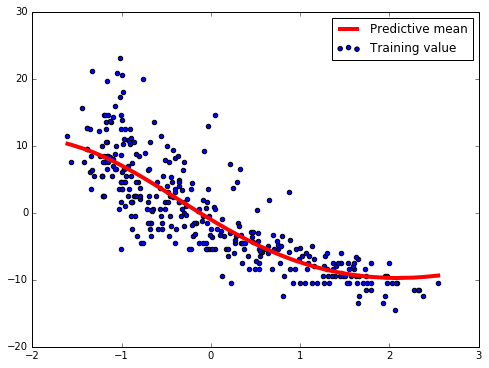

In [9]:
Y_pred=np.array(Y_pred)
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,3],Y_train,label='Training value')
plt.plot(X_train_4th_dim[X_train_4th.argsort(),1], Y_pred[X_train_4th.argsort()],color='r',label = 'Predictive mean',linewidth = 4)
plt.legend()

## 2(a): Implementation of boosting and training test error plot

In [10]:
#Import Data as Numpy Matrices
X_train = np.genfromtxt ('./boosting/X_train.csv', delimiter=",")
Y_train = np.genfromtxt ('./boosting/y_train.csv',delimiter=",")
X_test = np.genfromtxt ('./boosting/X_test.csv', delimiter=",")
Y_test = np.genfromtxt ('./boosting/y_test.csv',delimiter=",")

# Add bias to X_train and X_test

I=np.ones(len(X_train[:,0]))
X_train = np.hstack((np.ones((X_train.shape[0],1)),X_train))
X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))

In [11]:
# Boosting Implementation

# Initialize Weights, epsilon, alpha and freq_samples
prob_train = np.array([1.0/len(X_train) for i in xrange(len(X_train))])
epsilon_t_all = []
alpha_all=[]
w_all = []
sample_count=np.zeros(1500)
random_index_all=[]
for i in xrange(1500):
    
    # Draw a bootstrap Sample
    random_index = np.random.choice(range(0,len(X_train)),len(X_train),p=prob_train)
    B_t = X_train[random_index,:]
    y = Y_train[random_index]

    # Learn Classifier
    w = ((nplg.inv((np.transpose(B_t)).dot(B_t))).dot(np.transpose(B_t))).dot(y)

    # Predict y for the training and test data
    y_pred_train = np.sign(w.dot(np.transpose(X_train)))

    # obtain miss-classified samples
    miss_train = np.array([int(x) for x in (y_pred_train != Y_train)])
    
    # Calculate train and test error. Train error for obtaining probability distribution 
    epsilon_t = prob_train.dot(miss_train)
    
    # If error of train is more than 0.5 then reverse the classification
    if epsilon_t > 0.5:
        w=-w
        y_pred_train =  np.sign(w.dot(np.transpose(X_train)))
        miss_train = np.array([int(x) for x in (y_pred_train != Y_train)])
        epsilon_t = prob_train.dot(miss_train)
    
    alpha_t = 0.5*math.log((1-epsilon_t)/epsilon_t)
    prob_train = np.multiply((np.exp(-alpha_t*(np.multiply(Y_train,y_pred_train)))),prob_train)
    prob_train = (1.0/sum(prob_train))*prob_train
    
    epsilon_t_all.append(epsilon_t)
    alpha_all.append(alpha_t)
    w_all.append(w)
    random_index_all.append(random_index)


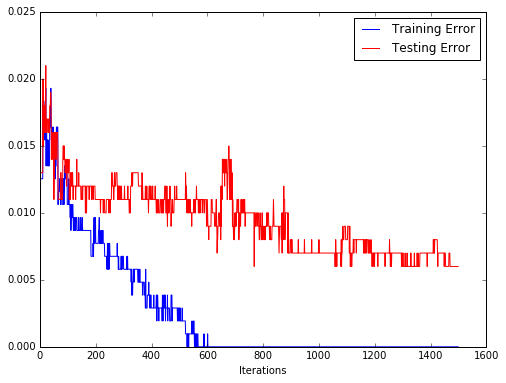

In [12]:
# Calculate train and test error:

w_all = np.array(w_all)
f_train = np.sign(w_all.dot(np.transpose(X_train)))
f_test = np.sign(w_all.dot(np.transpose(X_test)))

alpha_all_mat_train = np.hstack([np.transpose(np.matrix(alpha_all))]*f_train.shape[1])
alpha_all_mat_test = np.hstack([np.transpose(np.matrix(alpha_all))]*f_test.shape[1])

f_train_alpha = np.multiply(f_train,alpha_all_mat_train)
f_train_alpha_cum = np.cumsum(f_train_alpha,axis=0)
y_train_pred_boost = np.sign(f_train_alpha_cum)

f_test_alpha = np.multiply(f_test,alpha_all_mat_test)
f_test_alpha_cum = np.cumsum(f_test_alpha,axis=0)
y_test_pred_boost = np.sign(f_test_alpha_cum)

error_train = []
error_test = []

np.array(Y_train)
np.array(Y_test)

for pred in y_train_pred_boost:
    pred = np.array(pred.tolist()[0])
    miss_train = np.array([int(x) for x in (pred != Y_train)])
    error = (1.0*sum(miss_train))/len(Y_train)
    error_train.append(error)

for pred in y_test_pred_boost:
    pred = np.array(pred.tolist()[0])
    miss_test = np.array([int(x) for x in (pred != Y_test)])
    error = (1.0*sum(miss_test))/len(Y_test)
    error_test.append(error)


plt.figure(figsize=(8,6))
plt.plot(range(1500),error_train,color='b',label="Training Error")
plt.plot(range(1500),error_test,color = 'r',label="Testing Error")
plt.xlabel("Iterations")
plt.legend()

## 2(b): Upper Bound on the training error

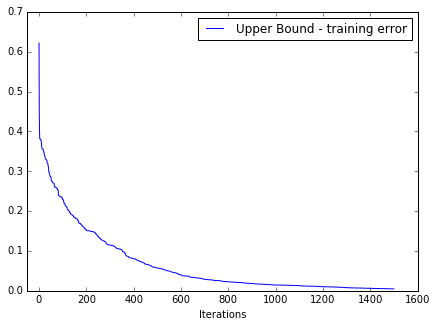

In [18]:
epsilon_t_all = np.array(epsilon_t_all)
A=np.square((0.5*np.ones(len(epsilon_t_all))-epsilon_t_all))
A_cum=np.cumsum(A)
upper_bound_t=np.exp(-2*A_cum)

# fig,axes=plt.subplots()
plt.figure(figsize=(7,5))
plt.plot(range(1500),upper_bound_t,label = "Upper Bound - training error")
plt.xlim([-50,1600])
plt.xlabel("Iterations")
plt.legend()

## 2(c): Histogram of samples

(-20, 1200)

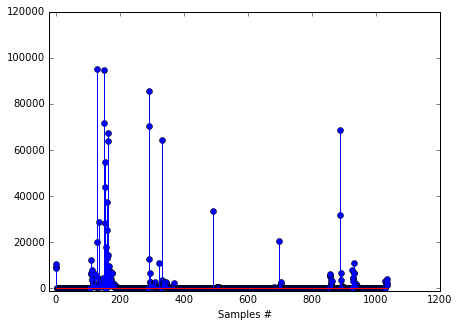

In [20]:
plt.figure(figsize=(7,5))
A = np.array(random_index_all).flatten()
unique, counts = np.unique(A, return_counts=True)
plt.stem(unique,counts)
plt.xlabel("Samples #")
plt.ylim([-1000,120000])
plt.xlim([-20,1200])
# print unique
# print counts


## 2(d): Epsilon, Alpha as a function of iterations

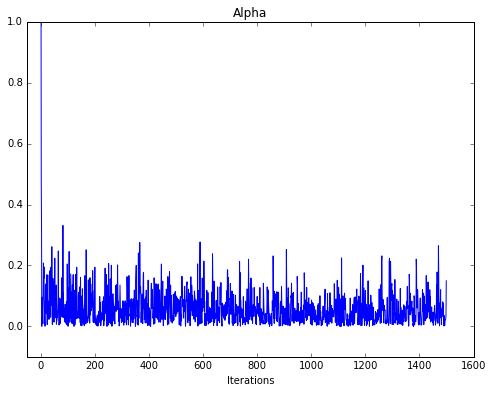

In [15]:
plt.figure(figsize=(8,6))
plt.plot(range(1500),alpha_all)
plt.xlim([-50,1600])
plt.ylim([-0.1,1])
plt.xlabel("Iterations")
plt.title("Alpha")

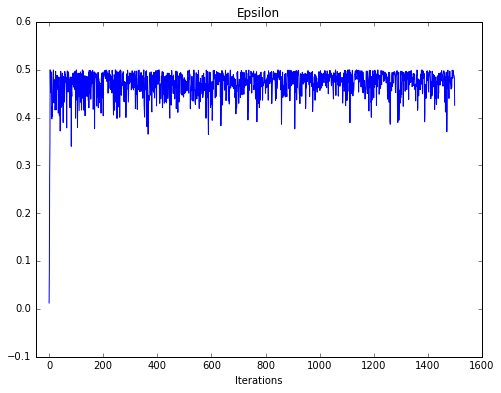

In [16]:
plt.figure(figsize=(8,6))
plt.plot(range(1500),epsilon_t_all)
plt.xlim([-50,1600])
plt.ylim([-0.1,0.6])
plt.xlabel("Iterations")
plt.title("Epsilon")